**Блок 1. Постановка задачи и первоначальные гипотезы;**

***Исследовательский вопрос:*** есть ли статистически значимая связь между интегральным индексом удовлетворенности (overall_satisfaction_index), агрегирующим оценки по трем аспектам удовлетворенности, и общей оценкой удовлетворенности (satisfaction_level)?
    
***Подход:*** для ответа на этот вопрос был расчитан интегральный индекс удовлетворенности (overall_satisfaction_index), агрегирующий оценки по трем аспектам с равными весами.
    
***Статистические гипотезы:***
    
**H₀:** Между overall_satisfaction_index и satisfaction_level отсутствует статистически значимая корреляция.

**H₁:** Между overall_satisfaction_index и satisfaction_level существует статистически значимая положительная корреляция.


In [46]:
#импортируем pandas и читаем csv файл

import pandas as pd
delivery_df=pd.read_csv("delivery_satisfaction_data.csv")

In [47]:
#изучаем структуру данных, проверяем данные на наличие пропусков
#мы не проверяем df на наличие выбросов и значений >5 и <1, так как данные получены путем опроса в приложении с фиксированными вариантами ответов

print(delivery_df.head())
print(delivery_df.shape)
print(delivery_df.info())

   delivery_time_min  food_quality  delivery_speed_rating  \
0                 44             5                      3   
1                 38             5                      4   
2                 46             4                      4   
3                 55             3                      1   
4                 37             5                      2   

   packaging_quality_rating  courier_politeness_rating  satisfaction_level  \
0                         3                          1                   5   
1                         4                          5                   2   
2                         3                          2                   4   
3                         4                          4                   3   
4                         2                          3                   4   

   price_satisfaction  delivery_person_ID  Restaurant_latitude  \
0                   4                 117            55.706858   
1                   4           

Рассчитаем интегральный индекс удовлетворенности (overall_satisfaction_index), отражающий уровень удовлетворенности клиентов отдельными
аспектами доставки:


1) **food_subindex** - уровень удовлетворенности качеством еды;

2) **delivery_subindex** - уровень удовлетворенности качеством доставки;

3) **price_subindex** - уровень удовлетворенности ценой заказа;

In [48]:
#создаем новые столбцы с саб-индексами - средними значениями удовлетворенности разными аспектами для каждого заказа:

delivery_df['delivery_subindex']=delivery_df[['delivery_speed_rating', 'packaging_quality_rating', 'courier_politeness_rating']].mean(axis=1)
delivery_df['price_subindex']=delivery_df['price_satisfaction']
delivery_df['food_subindex']=delivery_df['food_quality']

Присвоим саб-индексам веса: в нашем случае - равновесные коэффициенты 0.33
(т.к. в условиях решения учебного кейса нет возможности узнать мнение о важности каждого саб-индекса у бизнеса)

In [49]:
delivery_df['overall_satisfaction_index']=(delivery_df['food_subindex']*0.33+delivery_df['delivery_subindex']*0.33+delivery_df['price_subindex']*0.33)
delivery_df['overall_satisfaction_index']

0      3.74
1      4.40
2      3.63
3      2.97
4      3.74
       ... 
995    3.30
996    3.85
997    3.30
998    3.08
999    3.19
Name: overall_satisfaction_index, Length: 1000, dtype: float64

**Блок 1.2 Проверка данных и выбор метода исследования;**

**1.2.1 Анализ распределения непрерывной переменной (overall_satisfaction_index);**

Для корректного выбора метода корреляционного анализа необходимо было проверить распределение данных на соответствие нормальному.


***Для непрерывных данных (overall_satisfaction_index) были проведены следующие проверки:***


**а) Визуальный анализ;**

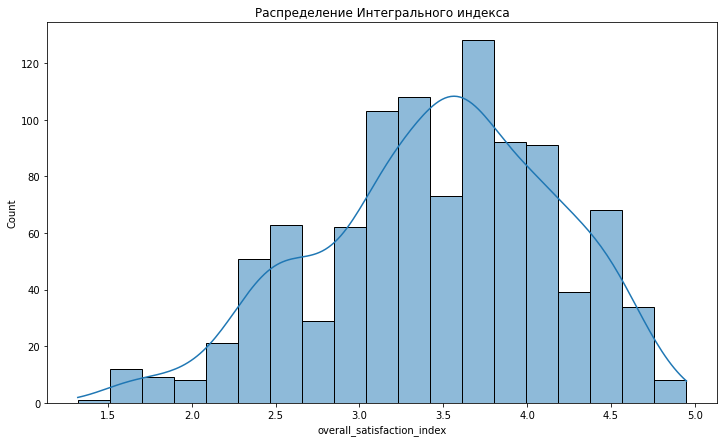

In [50]:
#гистограмма

#импортируем необходимые библиотеки

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

plt.subplot
sns.histplot(delivery_df['overall_satisfaction_index'], kde=True)
plt.title('Распределение Интегрального индекса');

**Выводы по графику:**
    
- визуальная схожесть распределения с нормальным: распределение является унимодальным и в целом симметрично, однако, имеет несколько "провалов";
- большинство значений сгруппировано в диапазоне от 2.5 до 4.5, с пиком около 3.75.


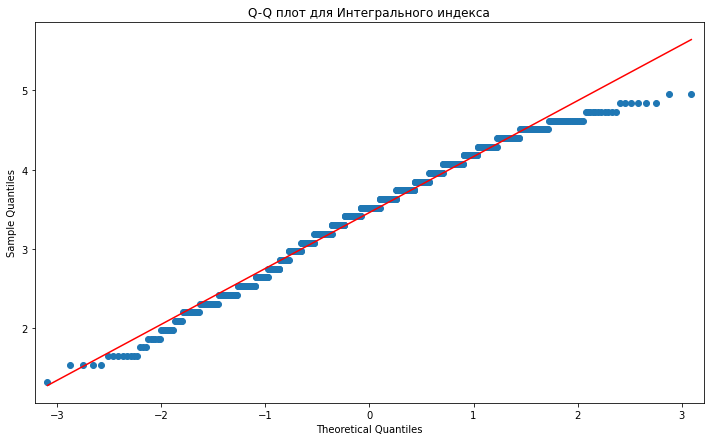

In [51]:
#QQ-plot

#импортируем необходимые библиотеки

import statsmodels.api as sm

plt.figure(figsize=(12, 7))

plt.subplot
sm.qqplot(delivery_df['overall_satisfaction_index'], line='s', ax=plt.gca())
plt.title('Q-Q плот для Интегрального индекса');

**Выводы по графику:**

- расположение большинства точек вблизи теоретической линии показывает, что распределение близко к нормальному;
- расположение точек "хвостах" указывает на то, что "хвосты" распределения легче, чем у идеального нормального распределения (экстремально высоких и низких значений несколько меньше, чем было бы в нормальном распределении);


**б) Статистический тест;**

Применим тест Шапиро-Уилка с расчетом p-value.

**H₀:** Данные в выборке извлечены из генеральной совокупности, имеющей нормальное распределение (распределение данных не отличается от нормального).

**H₁:** Распределение данных в выборке отличается от нормального (данные распределены не нормально).


In [52]:
#импортируем необходимые библиотеки

from scipy.stats import shapiro

stat_index, p_index = shapiro(delivery_df['overall_satisfaction_index'])
print(f'Статистика для индекса={stat_index:.3f}, p-value={p_index:.3f}')

# Добавим блок с автоматической интерпретацией p-value
alpha = 0.05 

if p_index > alpha:
    print('Распределение Индекса не отличается от нормального (не отвергаем H0)')
else:
    print('Распределение Индекса отличается от нормального (отвергаем H0)')

Статистика для индекса=0.983, p-value=0.000
Распределение Индекса отличается от нормального (отвергаем H0)


**Вывод:**
- тест Шапиро-Уилка показал, что распределение данных отличается от нормального;
- возможно, тест зафиксировал меньшее, чем в нормальном распределении, количество экстремально высоких и экстремально низких значений, визуально определенное нами на графике QQ-plot;

**1.2.2 Анализ дискретной переменной (satisfaction_level);**

Переменная satisfaction_level является дискретной (порядковой), так как она может принимать только ограниченный набор целых значений (1, 2, 3, 4, 5), поэтому для анализа будем использовать график countplot

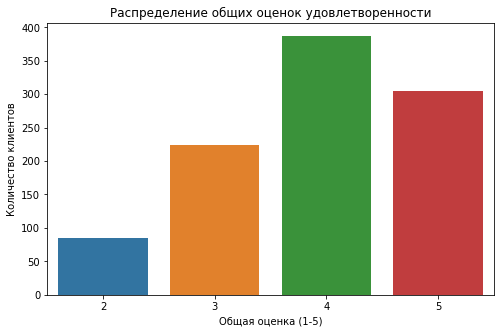

In [53]:
plt.figure(figsize=(8, 5))

sns.countplot(x='satisfaction_level', data=delivery_df)

plt.title('Распределение общих оценок удовлетворенности')
plt.xlabel('Общая оценка (1-5)')
plt.ylabel('Количество клиентов')
plt.show()

**Выводы по графику:**
- дискретность: данные являются дискретными, принимая только целые значения от 2 до 5;
- ненормальность: распределение асимметрично (скошено влево) и не соответствует нормальному. Наиболее частыми оценками являются "4" и "5";

**1.2.3 Проверка данных на линейность и монотонность;**

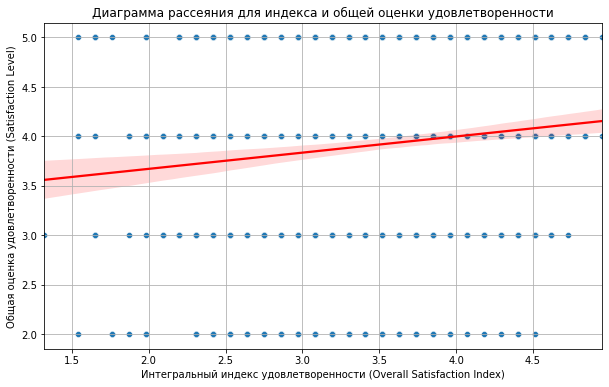

In [54]:
# диаграмма рассеяния (scatter plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_df)

sns.regplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_df, scatter=False, color='red')

plt.title('Диаграмма рассеяния для индекса и общей оценки удовлетворенности')
plt.xlabel('Интегральный индекс удовлетворенности (Overall Satisfaction Index)')
plt.ylabel('Общая оценка удовлетворенности (Satisfaction Level)')
plt.grid(True)
plt.show()

**Выводы по графику:**
- видимый наклон линии регрессии может свидетельствовать о наличии положительной связи, однако, наличие широкого доверительного интервала, в свою очередь, может свилетельствовать о том, что эта тенденция не является статистически значимой и, скорее всего, объясняется случайностью. Результат требует дополнительной проверки;
- отсутствие монотонной связи: отсутствует какой-либо тренд, для любого X - весь спектр значений Y;

**Вывод:**

учитывая дискретный и ненормальный характер распределения переменной satisfaction_level, использование параметрических методов, таких как корреляция Пирсона, было бы некорректным. Так же, ненормальный характер распределения переменной overall_satisfaction_index и отсутствие монотонной связи между переменными требует исследования с применением непараметрических методов, поэтому для дальнейшего анализа был выбран коэффициент ранговой корреляции Спирмена, который нечувствителен к форме распределения и предназначен для работы с порядковыми данными.

In [55]:
#расчет корреляции Спирмена и p-value

from scipy.stats import spearmanr

x = delivery_df['overall_satisfaction_index']
y = delivery_df['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.1129
P-value: 0.0003
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


Метод корреляции Спирмена выявил статистически значимую, но слабую положительную связь.

**Для углубленного анализа было принято решение отказаться от анализа "усредненного" клиента и перейти к сегментационному анализу, чтобы проверить гипотезу о наличии связи внутри каждой группы отдельно.**

-

**Блок 2. Постановка нового исследовательского вопроса и определение гипотез;**

Рассмотрев данные датафрейма, было принято решение разделить клиентов на сегменты по количеству совершенных за период заказов. Это разделение является условным в рамках данного учебного проекта, т.к. исходный датафрейм содержит недостаточно данных для более "подробной" сегментации.

***Исследовательский вопрос:*** есть ли связь между интегральным индексом удовлетворенности (overall_satisfaction_index), агрегирующим оценки по трем аспектам с равными весами, и уровнем удовлетворенности satisfaction_level внутри групп?
    
***Подход:*** для ответа на этот вопрос были построены диаграммы рассеяния (scatter plot) для каждой группы клиентов.
    
***Статистические гипотезы:***
    
**H₀:** Между overall_satisfaction_index и satisfaction_level в группах клиентов по количеству заказов отсутствует статистически значимая корреляция.

**H₁:** Между overall_satisfaction_index и satisfaction_level в группах клиентов по количеству заказов существует статистически значимая положительная корреляция.


In [56]:
#посчитаем количество заказов каждого клиента

orders_per_user_df = delivery_df.groupby('delivery_person_ID').size().reset_index(name='order_count')
print(orders_per_user_df)

     delivery_person_ID  order_count
0                     1            2
1                     2            4
2                     3            2
3                     4            1
4                     6            3
..                  ...          ...
290                 296            1
291                 297            5
292                 298            3
293                 299            3
294                 300            5

[295 rows x 2 columns]


In [57]:
#определим максимально число заказов

max_orders=orders_per_user_df['order_count'].max()
print(f'Максимальное количество заказов равно {max_orders}')

Максимальное количество заказов равно 9


**Разделим клиентов на группы по количеству заказов следующим образом:**
- 1-3 заказа - "новички";
- 4-6 заказов - "активные";
- 6-9 заказов - "лояльные";

In [58]:
#добавим в датафрейм delivery_merged столбец из датафрейма orders_per_user_df по столбцу delivery_person_ID

delivery_merged = pd.merge(delivery_df, orders_per_user_df, on='delivery_person_ID', how='left')
print(delivery_merged)

     delivery_time_min  food_quality  delivery_speed_rating  \
0                   44             5                      3   
1                   38             5                      4   
2                   46             4                      4   
3                   55             3                      1   
4                   37             5                      2   
..                 ...           ...                    ...   
995                 37             4                      3   
996                 57             5                      2   
997                 46             4                      1   
998                 34             5                      1   
999                 45             5                      1   

     packaging_quality_rating  courier_politeness_rating  satisfaction_level  \
0                           3                          1                   5   
1                           4                          5                   2   
2  

In [59]:
#отфильтруем датафрейм delivery_merged, оставив только клиентов из категории "новички", и сохраним в новый df

delivery_filtered_new=delivery_merged[delivery_merged['order_count'] <= 3]
delivery_filtered_new

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
0,44,5,3,3,1,5,4,117,55.706858,37.757640,55.708540,37.751251,1470.529899,2.333333,4,5,3.74,2
3,55,3,1,4,4,3,3,28,55.715939,37.728257,55.713865,37.728104,891.066112,3.000000,3,3,2.97,2
4,37,5,2,2,3,4,4,1,55.726075,37.415079,55.717051,37.428068,1331.031279,2.333333,4,5,3.74,2
6,55,5,5,4,2,5,5,56,55.601759,37.616920,55.597270,37.601016,905.111647,3.666667,5,5,4.51,2
7,47,4,1,1,3,5,3,35,55.623553,37.459240,55.615028,37.441701,948.563444,1.666667,3,4,2.86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,55,4,4,5,1,5,4,18,55.722678,37.436415,55.740529,37.432490,858.781918,3.333333,4,4,3.74,3
987,48,5,4,4,5,2,2,10,55.798591,37.659284,55.807925,37.662312,1402.013789,4.333333,2,5,3.74,2
991,19,4,2,5,5,4,5,195,55.656590,37.426837,55.640866,37.411030,1138.208006,4.000000,5,4,4.29,3
993,33,5,2,5,5,3,5,287,55.758575,37.708813,55.766459,37.701203,770.323025,4.000000,5,5,4.62,3


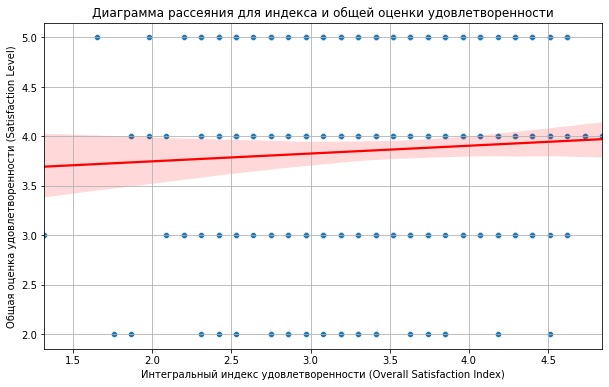

In [60]:
# диаграмма рассеяния (scatter plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_new)

sns.regplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_new, scatter=False, color='red')

plt.title('Диаграмма рассеяния для индекса и общей оценки удовлетворенности')
plt.xlabel('Интегральный индекс удовлетворенности (Overall Satisfaction Index)')
plt.ylabel('Общая оценка удовлетворенности (Satisfaction Level)')
plt.grid(True)
plt.show()

**Вывод по графику:**

- линия регрессии на диаграмме имеет незначительный положительный наклон - в сочетании с широким доверительным интервалом это может говорить о том, что данная тенденция не является статистически значимой и, скорее всего, объясняется случайностью. Результат требует дополнительной проверки;

**Произведем расчет корреляции Спирмена и p-value:**

In [61]:
x = delivery_filtered_new['overall_satisfaction_index']
y = delivery_filtered_new['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0435
P-value: 0.4045
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация:** корреляционный анализ Спирмена не выявил статистически значимой связи, что подтверждает результаты визуального анализа графика scatter plot.

In [62]:
#отфильтруем датафрейм delivery_merged, оставив только клиентов из категории "активные", и сохраним в новый df

delivery_filtered_active=delivery_merged[(delivery_merged['order_count']>3) & (delivery_merged['order_count']<7)]
delivery_filtered_active

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
1,38,5,4,4,5,2,4,164,55.809104,37.767948,55.825865,37.772782,840.479761,4.333333,4,5,4.40,4
2,46,4,4,3,2,4,4,288,55.768035,37.422063,55.784031,37.437702,1066.118685,3.000000,4,4,3.63,4
5,37,2,5,5,3,3,2,188,55.768633,37.546868,55.764360,37.542954,1238.273694,4.333333,2,2,2.75,6
12,42,4,5,5,1,5,5,80,55.681205,37.685755,55.668118,37.695468,696.359643,3.666667,5,4,4.18,4
13,20,3,1,3,1,4,1,83,55.711147,37.766657,55.704928,37.748691,1410.021995,1.666667,1,3,1.87,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,29,4,3,4,2,5,4,93,55.843181,37.731285,55.846654,37.750137,1117.593921,3.000000,4,4,3.63,6
995,37,4,3,4,2,2,3,145,55.820656,37.468212,55.833967,37.452927,829.941938,3.000000,3,4,3.30,4
996,57,5,2,5,1,5,4,86,55.799137,37.758968,55.782028,37.777298,1367.434438,2.666667,4,5,3.85,5
997,46,4,1,2,3,4,4,153,55.634016,37.662458,55.641644,37.646099,576.218432,2.000000,4,4,3.30,5


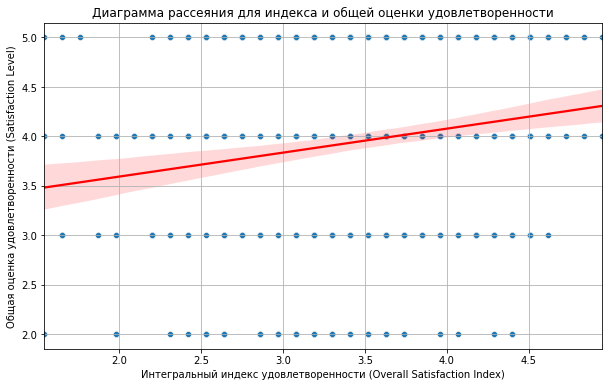

In [63]:
# диаграмма рассеяния (scatter plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_active)

sns.regplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_active, scatter=False, color='red')

plt.title('Диаграмма рассеяния для индекса и общей оценки удовлетворенности')
plt.xlabel('Интегральный индекс удовлетворенности (Overall Satisfaction Index)')
plt.ylabel('Общая оценка удовлетворенности (Satisfaction Level)')
plt.grid(True)
plt.show()

**Вывод по графику:** 
- линия регрессии имеет более выраженный наклон и, так же, как и на предыдущем графике - широкий доверительный интервал. Статистическая значимость тенденции требует уточнения;

**Произведем расчет корреляции Спирмена и p-value:**

In [64]:
x = delivery_filtered_active['overall_satisfaction_index']
y = delivery_filtered_active['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.1833
P-value: 0.0000
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


**Интерпретация:** корреляционный анализ Спирмена выявил статистически значимую, но слабую положительную связь - результат требует дополнительной проверки.

In [65]:
#отфильтруем датафрейм delivery_merged, оставив только клиентов из категории "лояльные", и сохраним в новый df

delivery_filtered_loyal=delivery_merged[delivery_merged['order_count']>=7]
delivery_filtered_loyal

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
9,45,3,3,2,1,4,2,286,55.623364,37.403342,55.637806,37.398548,816.662620,2.000000,2,3,2.31,8
20,54,4,5,5,5,3,4,181,55.723091,37.670052,55.721904,37.682220,1164.303457,5.000000,4,4,4.29,7
25,41,5,5,4,4,5,5,181,55.736188,37.476807,55.750082,37.477215,1048.488809,4.333333,5,5,4.73,7
30,33,5,5,1,3,2,2,100,55.681695,37.796089,55.683408,37.791109,1201.226793,3.000000,2,5,3.30,7
32,39,4,5,4,1,5,5,103,55.675599,37.404712,55.669510,37.398437,671.233716,3.333333,5,4,4.07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,39,4,1,5,5,4,3,26,55.750059,37.714940,55.763848,37.697105,1504.794294,3.666667,3,4,3.52,7
970,41,4,3,3,1,4,5,103,55.810388,37.529558,55.808022,37.526672,651.331645,2.333333,5,4,3.74,7
978,24,2,2,5,2,3,2,92,55.896765,37.663662,55.895527,37.674353,941.309779,3.000000,2,2,2.31,7
979,47,4,2,1,5,4,4,286,55.650049,37.559222,55.643414,37.575437,1025.862512,2.666667,4,4,3.52,8


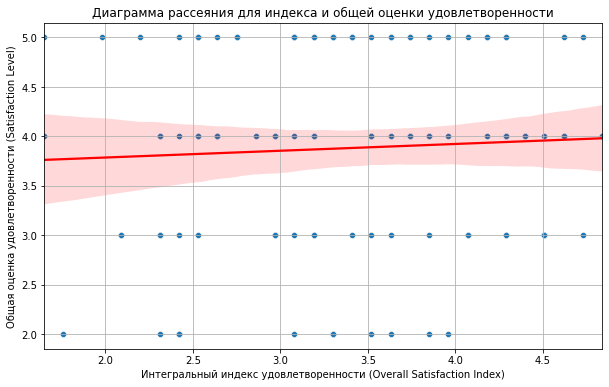

In [66]:
# диаграмма рассеяния (scatter plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_loyal)

sns.regplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_filtered_loyal, scatter=False, color='red')

plt.title('Диаграмма рассеяния для индекса и общей оценки удовлетворенности')
plt.xlabel('Интегральный индекс удовлетворенности (Overall Satisfaction Index)')
plt.ylabel('Общая оценка удовлетворенности (Satisfaction Level)')
plt.grid(True)
plt.show()

**Вывод по графику:**
- линия регрессии имеет незначительный наклон и широкий доверительный интервал, что ставит под сомнение статистическую значимость полученной связи;
- однако, широкий доверительный интервал указывает на то, что с большой долей вероятности эта тенденция не является статистически значимой и, скорее всего, объясняется случайностью


**Произведем расчет корреляции Спирмена и p-value:**

In [67]:
x = delivery_filtered_loyal['overall_satisfaction_index']
y = delivery_filtered_loyal['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0308
P-value: 0.7518
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация:** корреляционный анализ Спирмена не выявил статистически значимой связи, что подтверждает результаты визуального анализа графика scatter plot.

**Вывод:** корреляционный анализ Спирмена выявил слабую, но статистически значимую связь между интегральным индексом удовлетворенности (overall_satisfaction_index) и общей оценкой удовлетворенности (satisfaction_level) только для клиентов категории "активные". Интегральный индекс в его текущем виде не является хорошим предиктором итоговой оценки, которую поставит клиент. Возможно, данная метрика "не работает" из-за присвоенных сабиндексам равных весов - возможно, стоит провести регрессионный анализ и повторить расчеты. Это указывает на необходимость более глубокого, сегментированного анализа для поиска истинных драйверов удовлетворенности.

**Блок 3. Исследование связи между отдельными аспектами удовлетворенности клиентов и общей оценкой удовлетворенности (satisfaction_level).**

***Исследовательский вопрос:*** есть ли связь между отдельными компонентами overall_satisfaction_index и общей оценкой удовлетворенности (satisfaction_level) для всей выборки?
    
***Подход:*** для ответа на этот вопрос был проведен корреляционный анализ Спирмена, построены диаграммы рассеяния.
    
***Статистические гипотезы:***
    
**H₀:** Между отдельными компонентами overall_satisfaction_index и satisfaction_level для всей выборки отсутствует статистически значимая корреляция.

**H₁:** Между отдельными компонентами overall_satisfaction_index и satisfaction_level для всей выборки существует статистически значимая положительная корреляция.


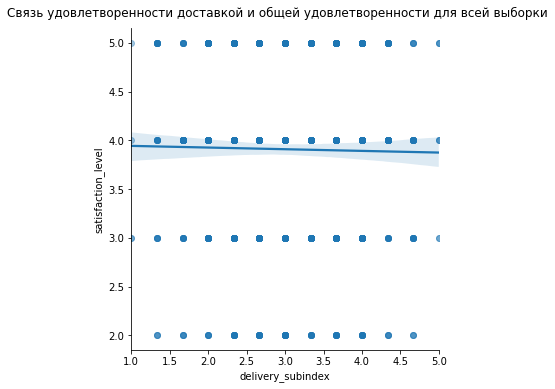

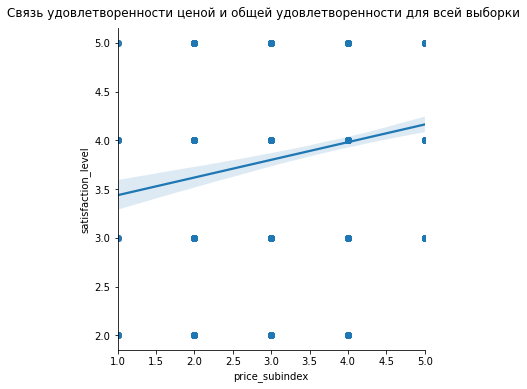

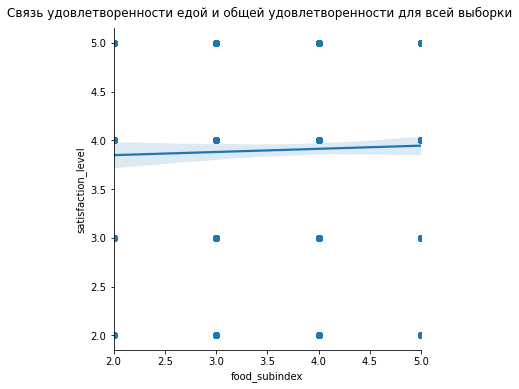

In [68]:
#построим диаграммы рассеяния

sns.lmplot(
    data=delivery_merged,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

sns.lmplot(
    data=delivery_merged,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

sns.lmplot(
    data=delivery_merged,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

**Интерпретация графиков:**
- точки данных на графиках распределены хаотично, не образуя явного паттерна или тренда;
- линии регрессии на 1 и 3 графиках (delivery_subindex и food_subindex) имеют незначительный наклон при больших доверительных интервалах, что указывает на то, что с большой долей вероятности эти тенденции не являются статистически значимыми;
- линия регрессии на 2 графике (price_subindex) имеет более выраженный наклон при достаточно широком доверительном интервале, что может говорить о наличии положительной линейной связи и требует последующей проверки;

**Посчитаем корреляции между отдельными компонентами overall_satisfaction_index и satisfaction_level по всем заказам**

In [69]:
x = delivery_df['price_subindex']
y = delivery_df['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.1876
P-value: 0.0000
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


In [70]:
x = delivery_df['food_subindex']
y = delivery_df['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0326
P-value: 0.3028
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


In [71]:
x = delivery_df['delivery_subindex']
y = delivery_df['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): -0.0134
P-value: 0.6723
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация:** корреляционный анализ Спирмена выявил статистически значимую слабую положительную связь между price_subindex и satisfaction_level, что подтверждает результаты визуального анализа диаграмм рассеяния.

**Вывод:** на основании визуального анализа диаграмм рассеяния и расчета коэффициентов корреляции Спирмена для каждого сабиндекса можно сделать вывод, что удовлетворенность ценой потенциально может являться фактором общей удовлетворенности для "усредненного" клиента. Сила связи позволяет считать ее "слабым сигналом", требующим дальнейшего изучения и уточнения. Связь с оценками доставки и качества еды является статистически незначимой. 

В рамках исследования далее было решено изучить связи между общей оценкой удовлетворенности (satisfaction_level) и отдельными саб-индексами, агрегированными в overall_satisfaction_index для выделенных ранее групп клиентов.


**Блок 4. Исследование связи между общей оценкой удовлетворенности (satisfaction_level) и отдельными саб-индексами overall_satisfaction_index для отдельных групп клиентов.**

***Исследовательский вопрос:*** есть ли связь между отдельными компонентами overall_satisfaction_index и общей оценкой удовлетворенности (satisfaction_level) для групп клиентов по количеству совершенных заказов?

***Подход:*** для ответа на этот вопрос был проведен корреляционный анализ Спирмена, построены диаграммы рассеяния.

***Статистические гипотезы:***

**H₀:** Между отдельными компонентами overall_satisfaction_index и satisfaction_level для групп клиентов по количеству совершенных заказов отсутствует статистически значимая корреляция.

**H₁:** Между отдельными компонентами overall_satisfaction_index и satisfaction_level для групп клиентов по количеству совершенных заказов существует статистически значимая положительная корреляция.


***Ограничение исследования: мы проводим суммарно 12 тестов корреляции, что повышает вероятность получения ошибки первого рода. Возможно, для корректности результатов нужно бы было применить поправку Бонферрони.***

In [72]:
#посчитаем корреляции между отдельными компонентами overall_satisfaction_index и satisfaction_level по сегментам отдельно

In [73]:
#добавим в датафрейм delivery_merged столбец с категорией клиента

client_category=[]
for count in delivery_merged['order_count']:
    if count<=3:
        client_category.append('new')
    elif count>3 and count<=6:
        client_category.append('active')
    else:
        client_category.append('loyal')

delivery_merged['client_category']=client_category

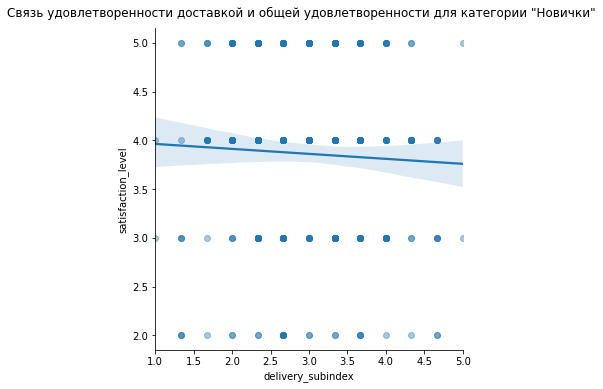

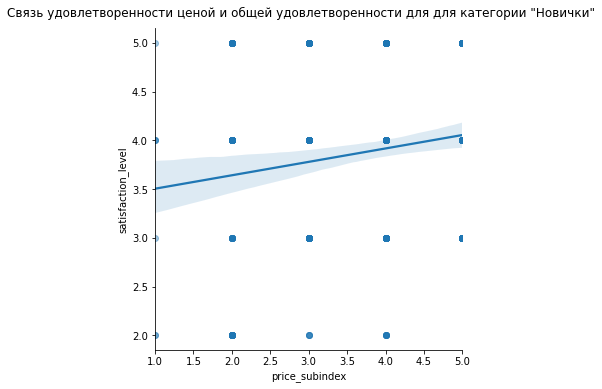

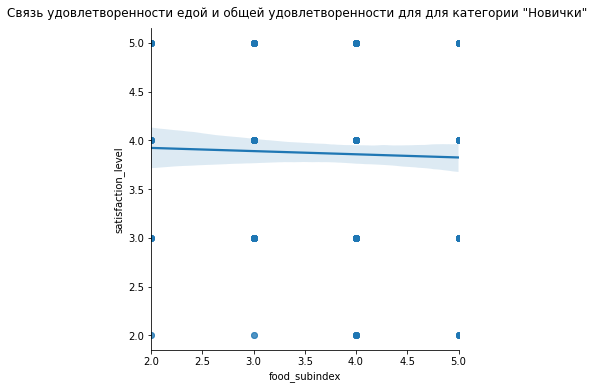

In [74]:
# сделаем расчеты для группы "новички"

subset_new = delivery_merged[delivery_merged['client_category'] == 'new']

sns.lmplot(
    data=subset_new,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для категории "Новички"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_new,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для для категории "Новички"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_new,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для для категории "Новички"', y=1.03)
plt.show()

**Интерпретация графиков:**

- точки данных на графиках распределены хаотично, не образуя явного паттерна или тренда;
- линии регрессии на 1 и 3 графиках (delivery_subindex и food_subindex) имеют незначительный наклон при больших доверительных интервалах, что указывает на то, что с большой долей вероятности эти тенденции не являются статистически значимыми;
- линия регрессии на 2 графике (price_subindex) имеет более выраженный наклон при достаточно широком доверительном интервале, что может говорить о наличии положительной линейной связи и требует последующей проверки;

**Посчитаем корреляции между отдельными компонентами overall_satisfaction_index и satisfaction_level для данной категории клиентов**

In [75]:
#расчет корреляции Спирмена и p-value (price_subindex)

x = subset_new['price_subindex']
y = subset_new['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.1357
P-value: 0.0090
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


In [76]:
#расчет корреляции Спирмена и p-value (food_subindex)

x = subset_new['food_subindex']
y = subset_new['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): -0.0299
P-value: 0.5660
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


In [77]:
#расчет корреляции Спирмена и p-value (delivery_subindex)

x = subset_new['delivery_subindex']
y = subset_new['satisfaction_level']

corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): -0.0624
P-value: 0.2313
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация:** корреляционный анализ Спирмена выявил статистически значимую положительную, но слабую, связь между price_subindex и satisfaction_level для данного сегмента клиентов, что подтверждает результаты визуального анализа диаграмм рассеяния.

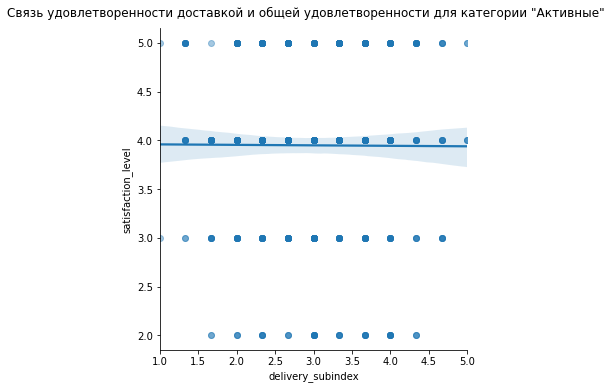

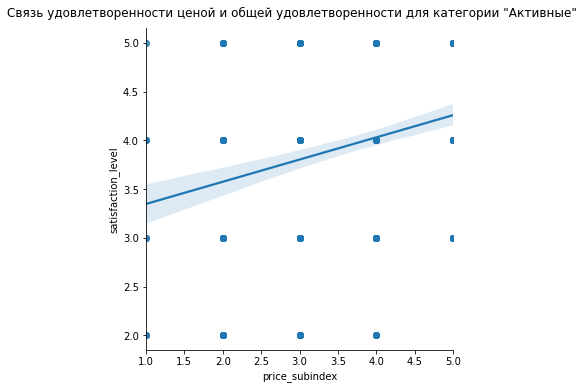

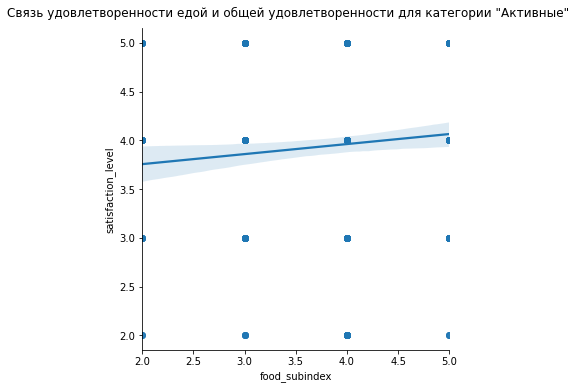

In [78]:
# сделаем расчеты для группы "активные"

subset_active = delivery_merged[delivery_merged['client_category'] == 'active']

sns.lmplot(
    data=subset_active,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для категории "Активные"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_active,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для категории "Активные"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_active,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для категории "Активные"', y=1.03)
plt.show()

**Интерпретация графиков:**

- линия регрессии на 1 графике (delivery_subindex) имеет незначительный наклон при большом доверительном интервале, что указывает на то, что с большой долей вероятности эта тенденция не является статистически значимой;
- линии регрессии на графиках 2 и 3 (price_subindex и food_subindex) имеют более выраженный наклон при достаточно широком доверительном интервале, что может говорить о наличии положительной линейной связи и требует последующей проверки;

**Посчитаем корреляции между отдельными компонентами overall_satisfaction_index и satisfaction_level для данной категории клиентов**

In [79]:
#расчет корреляции Спирмена и p-value (price_subindex)

x = subset_active['price_subindex']
y = subset_active['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.2471
P-value: 0.0000
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


In [80]:
#расчет корреляции Спирмена и p-value (food_subindex)

x = subset_active['food_subindex']
y = subset_active['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0989
P-value: 0.0239
Результат статистически значим: отвергаем нулевую гипотезу.
Есть основания полагать, что между переменными существует линейная связь.


In [81]:
#расчет корреляции Спирмена и p-value (delivery_subindex)

x = subset_active['delivery_subindex']
y = subset_active['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Добавим блок с автоматической интерпретацией p-value

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0083
P-value: 0.8499
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация:** корреляционный анализ Спирмена выявил статистически значимую слабую положительную связь между price_subindex и satisfaction_level, а также статистически значимую слабую положительную связь между food_subindex и satisfaction_level для данного сегмента клиентов, что подтверждает результаты визуального анализа диаграмм рассеяния.

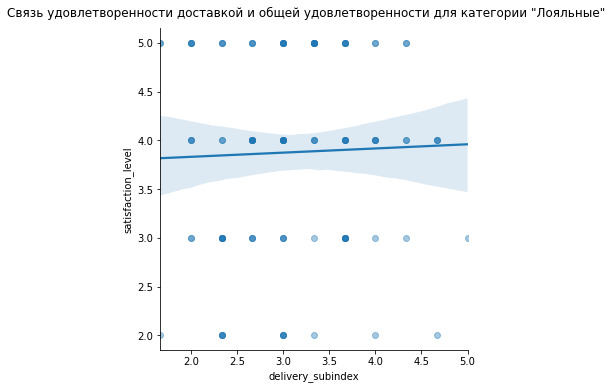

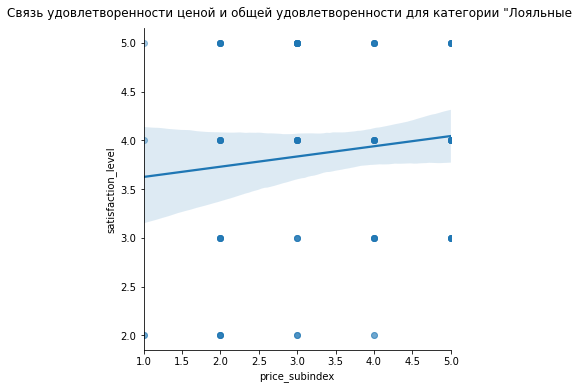

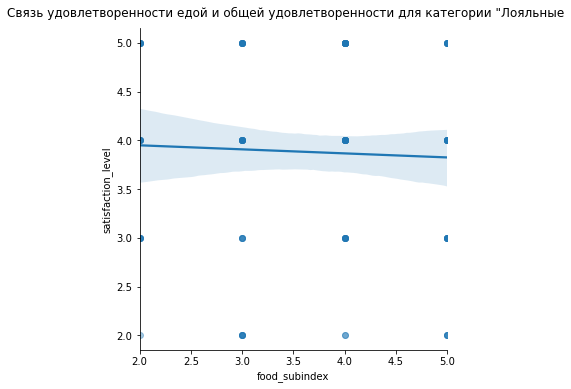

In [82]:
# сделаем расчеты для группы "лояльные"

subset_loyal = delivery_merged[delivery_merged['client_category'] == 'loyal']

sns.lmplot(
    data=subset_loyal,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для категории "Лояльные"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_loyal,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для категории "Лояльные', y=1.03)
plt.show()

sns.lmplot(
    data=subset_loyal,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для категории "Лояльные', y=1.03)
plt.show()

**Интерпретация графиков:**


-линии регрессии на всех 3-х графиках имеют видимый наклон при больших доверительных интервалах, что указывает на то, что с большой долей вероятности эти тенденции не являются статистически значимыми; требуется дальнейшая проверка;

**Посчитаем корреляции между отдельными компонентами overall_satisfaction_index и satisfaction_level для данной категории клиентов**

In [83]:
#расчет корреляции Спирмена и p-value (price_subindex)

x = subset_loyal['price_subindex']
y = subset_loyal['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Автоматическая интерпретация
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0860
P-value: 0.3763
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


In [84]:
#расчет корреляции Спирмена и p-value (food_subindex)

x = subset_loyal['food_subindex']
y = subset_loyal['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Автоматическая интерпретация
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): -0.0501
P-value: 0.6064
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


In [85]:
#расчет корреляции Спирмена и p-value (delivery_subindex)

x = subset_loyal['delivery_subindex']
y = subset_loyal['satisfaction_level']

# Рассчитываем коэффициент Спирмена и p-value
corr_coef, p_value = spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Автоматическая интерпретация
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу.")
    print("Есть основания полагать, что между переменными существует линейная связь.")
else:
    print("Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.")
    print("Наблюдаемая линейная связь могла возникнуть случайно.")

Коэффициент корреляции Спирмена (r): 0.0440
P-value: 0.6512
Результат не является статистически значимым: не можем отвергнуть нулевую гипотезу.
Наблюдаемая линейная связь могла возникнуть случайно.


**Интерпретация**: корреляционный анализ Спирмена не выявил статистически значимых связей между сабиндексами и оценкой satisfaction_level для данного сегмента клиентов, что подтверждает результаты визуального анализа диаграмм рассеяния.

**Блок 5. Визуализация полученных данных.**

Для создания столбчатой диаграммы, визуализирующей полученные нами статистически значимые результаты, создадим новый df с данными о коэффициентах корреляции Спирмена.

In [86]:
#создаем датафрейм с данными о статистически значимых коэффициентах корреляции

spearman_coeff={'client_category':['all_customers', 'loyal_customers', 'active_customers', 'new_customers'],
            'correlation_food': [None, None, 0.0989, None],
            'correlation_price': [0.1876, None, 0.2471, 0.1357],
            'correlation_delivery': [None, None, None, None],}
spearman_df=pd.DataFrame(spearman_coeff)
spearman_df=spearman_df.set_index('client_category')

print(spearman_df)

                  correlation_food  correlation_price correlation_delivery
client_category                                                           
all_customers                  NaN             0.1876                 None
loyal_customers                NaN                NaN                 None
active_customers            0.0989             0.2471                 None
new_customers                  NaN             0.1357                 None


In [87]:
#трансформируем датафрейм для построения графика

df_for_plot = spearman_df.reset_index()

df_melted = df_for_plot.melt(
    id_vars='client_category',                                
    value_vars=['correlation_food', 'correlation_price', 'correlation_delivery'],
    var_name='аспект_удовлетворенности',                           
    value_name='коэффициент_r'                                
)

# Удалим строки с пропусками, чтобы они не мешались на графике
df_melted.dropna(inplace=True)

print("Трансформированный датафрейм (готов к построению графика):")
print(df_melted)


Трансформированный датафрейм (готов к построению графика):
    client_category аспект_удовлетворенности коэффициент_r
2  active_customers         correlation_food        0.0989
4     all_customers        correlation_price        0.1876
6  active_customers        correlation_price        0.2471
7     new_customers        correlation_price        0.1357


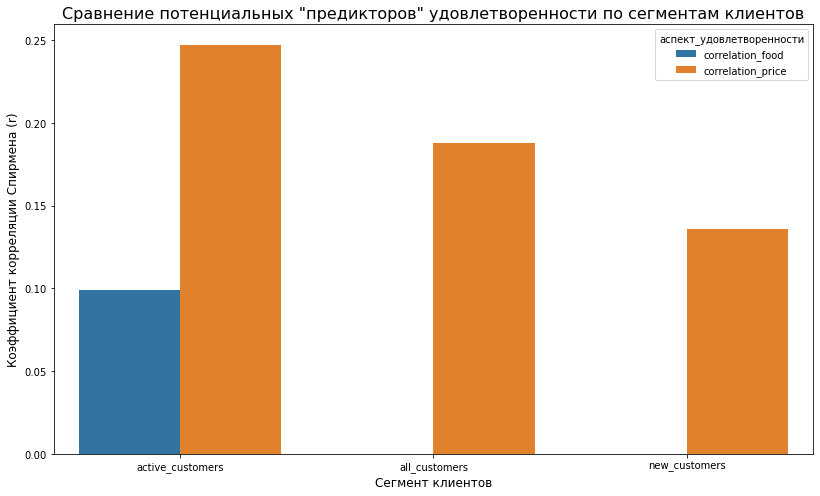

In [89]:
#создаем диаграмму "Сравнение потенциальных "предикторов" удовлетворенности по сегментам клиентов"

plt.figure(figsize=(12, 7))

sns.barplot(
    data=df_melted,
    x='client_category',     
    y='коэффициент_r',        
    hue='аспект_удовлетворенности'  
)

plt.axhline(0, color='black', linewidth=0.8)

plt.title('Сравнение потенциальных "предикторов" удовлетворенности по сегментам клиентов', fontsize=16)
plt.xlabel('Сегмент клиентов', fontsize=12)
plt.ylabel('Коэффициент корреляции Спирмена (r)', fontsize=12)

plt.tight_layout()
plt.show()

**Интерпретация графика:** 

**Важно учитывать, что все полученные нами статистически значимые коэффициенты корреляции свидетельствуют о слабой положительной связи. С учетом множественного характера тестирования, мы можем считать эти связи скорее "сигналами", требующими дальнейшего прояснения и уточнения, чем полноценными драйверами удовлетворенности.**


**1) "Средний клиент":**


- проведенные исследования выявили статистически значимую слабую положительную (r=0.1876) связь между оценкой satisfaction_level и сабиндексом price_subindex;


- анализ на общей выборке ("средний клиент") выявил только один потенциальный драйвер (цена). Дальнейший анализ показал, этот "средний" результат скрывает более сложные паттерны внутри сегментов;


**2) "Новые клиенты":**



- проведенные исследования выявили статистически значимую слабую положительную (r=0.1357) связь между оценкой satisfaction_level и сабиндексом price_subindex;


- рекомендация для дальнейшего исследования: можно выдвинуть гипотезу, что этот сегмент особенно чувствителен к промо-акциям (применение купонов, промокодов); 

- возможный метод исследования: проведение A/B теста - одной группе пользователей-новичков предлагается скидка на заказ, а контрольной группе — нет, затем их средние оценки satisfaction_level и конверсия в повторный заказ сравниваются;


**3) "Активные клиенты":**


- проведенные исследования выявили статистически значимую слабую положительную (r=0.2471) связь между оценкой satisfaction_level и сабиндексом price_subindex, а также статистически значимую слабую положительную (r=0.0989) связь между оценкой satisfaction_level и сабиндексом food_subindex;



- полученные результаты могут свидетельствовать о том, что более "зрелых" клиентов больше интересует соотношение "цена-качество" - исследование может быть продолжено в контексте более детального выяснения факторов удовлетворенности для данного сегмента;



**4) "Лояльные клиенты":**



- проведенные исследования не выявили статистически значимых связей между оценкой satisfaction_level и сабиндексами price_subindex, food_subindex, delivery_subindex;



- традиционно замеряемые факторы удовлетворенности "не работают" для данной группы клиентов - необходимо провести исследование для выявления истинных драйверов удовлетворенности для категории "Лояльные";

**Блок 6. Продолжение исследования драйверов удовлетворенности клиентов сегмента "Лояльные"**

Исследование данной категории является наиболее важным, т.к.

**а) это клиенты, принесшие компании наибольшую прибыль;**

**б) это единственная группа клиентов, для которой не выявлено не только ни одного значимого драйвера удовлетворенности, но даже какого-либо "сигнала", указывающего в его направлении;**



**Выделим гипотезы о факторах, которые могут влиять на оценку удовлетворенности лояльных клиентов:**


- __удобство интерфейса мобильного приложения (привычный интерфейс)__ - для клиента важно быстро сделать заказ в привычном и знакомом интерфейсе;

- __отсутствие негативного опыта (надежность)__ - для клиента важно, что еда приедет теплой, заказ не перепутают и не разольют, заказ всегда привозят примерно за одно и то же время;


- __интеграция в образ жизни__ - клиент заказывает нашу доставку в одних и тех же ситуациях (вечером в пятницу на посиделках с друзьями, на обед с коллегами в офисе, на семейный ужин в воскресенье и т.д.);


**Цель исследования:**
- выявление истинных драйверов удовлетворенности клиентов категории "Лояльные".

**Методы проведения исследования:**

- количественное исследование;
- полуструктурированное интервью.

**Задачи:**


**а) количественное исследование:**


***Проверка гипотезы  "удобство интерфейса мобильного приложения (привычный интерфейс)"***


- замерить среднее время от открытия приложения до оформления заказа (гипотеза - у лояльных клиентов это время значительно меньше, чем у новичков);


- расчитать частоту использования функции "повторить заказ" или функции "избранное" (гипотеза - лояльные клиенты чаще новичков и активных пользуются функциями, ускоряющими процесс заказа);


- расчитать коэффициент корреляции между уровнем удовлетворенности (satisfaction_level) и долей заказов с помощью функций "повторить заказ" или "избранное" (гипотеза - возможна статистически значимая высокая положительная корреляция между количеством заказов, совершенных с помощью функций, ускоряющих заказ, с уровнем удовлетворенности);


- рассчитать долю "беспроблемных заказов" для каждого клиента от всех совершенных заказов, а затем проверить корреляцию с satisfaction_level (гипотеза - чем выше  доля "беспроблемных заказов", тем выше удовлетворенность);


***Проверка гипотезы "отсутствие негативного опыта (надежность)"***

- рассчитать стандартное отклонение времени доставки (гипотеза - тем выше удовлетворенность, чем ниже вариативность времени доставки);

- рассчитать частоту обращений в поддержку с проблемами "неполный заказ", "заказ приехал холодным", "заказ поврежден", "курьер сильно опоздал";

**б) качественное исследование:**

***Проверка перечисленных выше гипотез + проверка гипотезы "интеграция в образ жизни"***

- определить критерии и объем выборки;
- определить каналы отбора респондентов;
- составить анкету для отбора респондентов;
- провести полуструктурированное интервью длительностью 45-60 минут.


**Размер выборки:**
- первоначально - 8-10 респондентов (выборка может быть увеличена в случае необходимости - до момента получения принципиально новой информации).

**Каналы отбора респондентов:** 
- Email-рассылка клиентам данной категории;
- пуш-уведомдение в приложении клиентам данной категории;

**Текст:**
- готовы ли вы уделить 45-60 минут своего времени для беседы онлайн? Предложим промокод n% на следующую доставку

**План полуструктурированного интервью.**

***1) Тема:***
- Субъективный опыт использования *нашего приложения доставки еды;

***Возможные вопросы:***
- Расскажите о последнем опыте использования нашего приложения. Что это была за ситуация?

или

- Расскажите о типичной ситуации, когда вы заказываете в нашем приложении. Когда это обычно происходит?


***2) Тема:***
- Субъективные причины выбора нашего приложения доставки еды;

***Возможные вопросы:***
- Почему вы регулярно выбираете наше приложение?/Что заставляет вас снова и снова возвращаться в наше приложение?


- Бывало ли, что в момент совершения заказа вы рассматривали другое приложение для доставки, но останавливались на нашем? Почему?


или

- Сравните наше приложение с *конкурент*? Чем мы для вас отличаемся?


- Если бы наш сервис внезапно прекратил работу, чего бы вам не хватало?

- Какую проблему в вашей жизни решает наш сервис?

***3) Тема:***
- Проверка результатов проведенного исследования;

***Возможные вопросы:***
- Для вас важна цена, качество еды? Или может быть качество курьерской доставки? Почему да/нет?

**Также может быть проведено UX-исследование, например, в формате юзабилити-тестирования с последующим интервью:**

- просим клиента из группы "Лояльные" выполнить типичную задачу в нашем приложении, комментируя действия вслух;

**Таким образом мы можем проверить гипотезу "удобство интерфейса мобильного приложения (привычный интерфейс)"**

- клиент может быстро и не задумываясь нажимать на кнопки, использовать функцию "повторный заказ";

- клиент может использовать одну неочевидную удобную для него фичу;




**Блок 7. Примеры возможного влияния на бизнес.**

**Проведение данного исследования позволит нам:**


- приоритизировать разработку фич, направленных на удержание лояльных клиентов; 


- приотизировать улучшение и доработку важных для лояльных клиентов функций; 


- разработка программы лояльности, основанной на ценностях лояльных клиентов, выявленных в ходе исследования;